## 위상 정렬 (topology sort)

### 1. 위상 정렬(topology sort) 
1. 순서가 정해져 있는 일련의 작업을 차례대로 수행해야 할 때 사용할 수 있는 알고리즘이다.
2. 사이클이 없는 방향 그래프의 모든 노드를 방향성에 거스르지 않도록 순서대로 나열한다.
3. 진입 차수와 진출 차수
  - 진입 차수(Indegree) : 특정한 노드로 들어오는 간선의 개수
  - 진출 차수(Outdegree) : 특정한 노드에서 나가는 간선의 개수

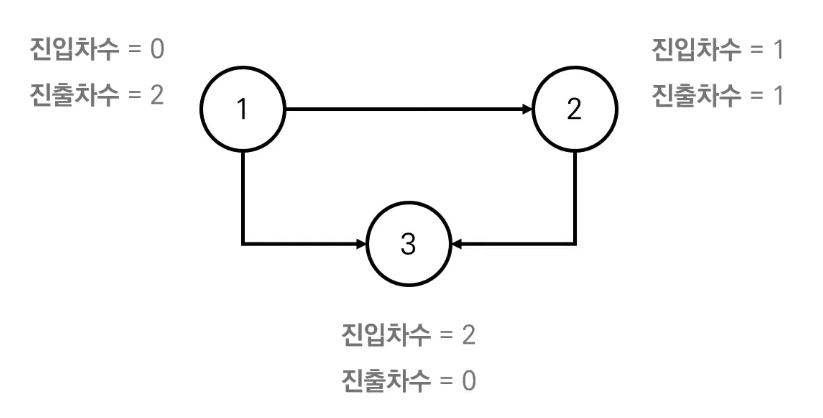

#### 예시) 선수과목을 고려한 학습 순서 설정
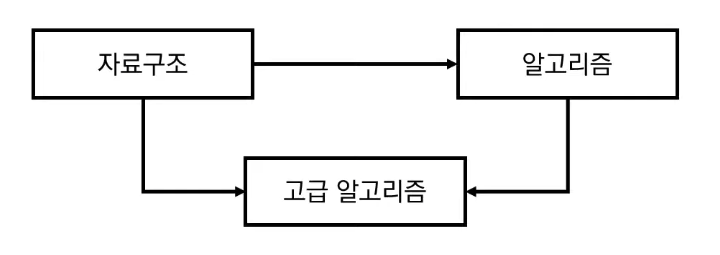

위 세 과목을 모두 듣기 위한 적절한 학습 순서는?
- 자료구조 → 알고리즘 → 고급 알고리즘 (O)
- 자료구조 → 고급 알고리즘 → 알고리즘 (X)

### 2. 알고리즘 이해
1. 위상 정렬 알고리즘은 큐를 이용하여 동작한다.<br>
2. 진입 차수가 0인 모든 노드를 큐에 넣는다.<br>
3. 큐가 빌 때까지 다음의 과정을 반복한다.<br>
    - 큐에서 원소를 꺼내 해당 노드에서 나가는 간선을 그래프에서 제거한다.
    - 새롭게 진입 차수가 0이 된 노드를 큐에 넣는다.
<br>
<br>
4. 위상 정렬 동작 예시<br>
    - 위상 정렬을 수행할 그래프를 준비한다. 이때 그래프는 사이클이 없는 방향 그래프(DAG)이어야 한다.
    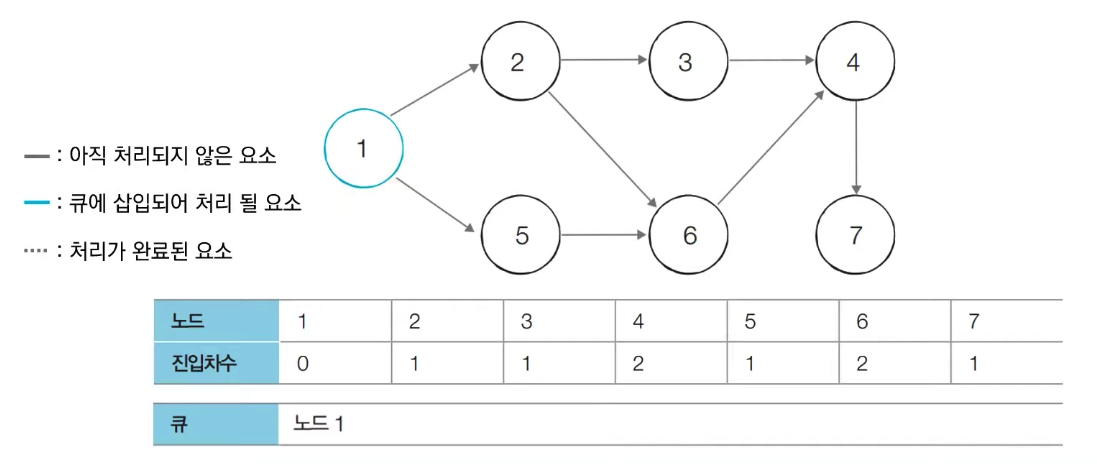<br>
    - 초기 단계에서는 진입 차수가 0인 모든 노드를 큐에 넣는다. 처음 노드 1이 큐에 삽입된다.
    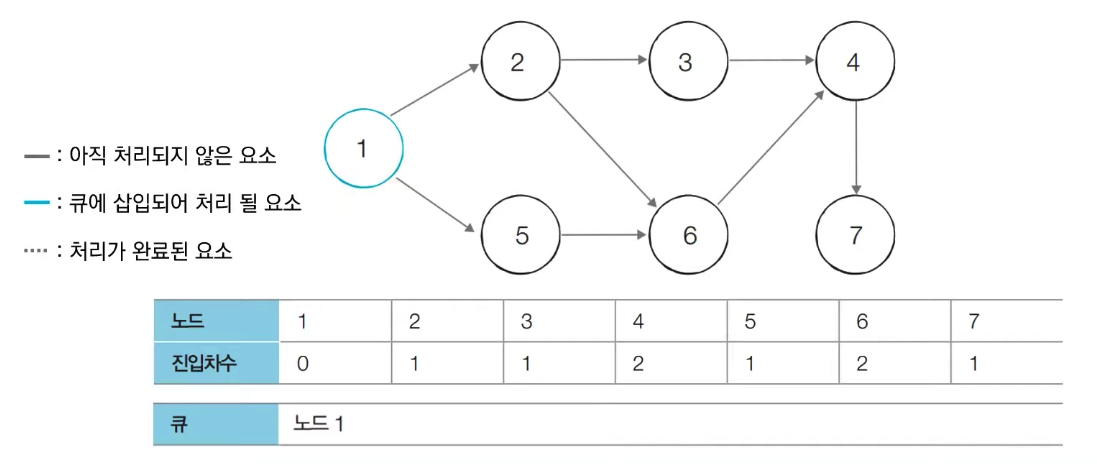<br>
    - 큐에서 노드 1을 꺼낸 뒤 노드 1에서 나가는 간선을 제거한다. 그리고 새롭게 진입 차수가 0이 된 노드들을 큐에 삽입한다.
    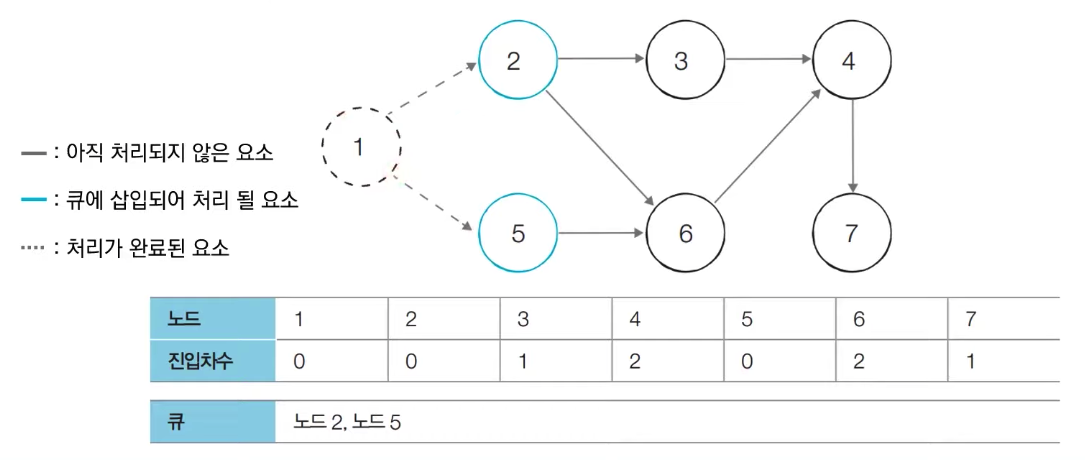<br>
    - 큐에서 노드 2를 꺼낸 뒤에 노드 2에서 나가는 간선을 제거한다. 새롭게 진입차수가 0이 된 노드들을 큐에 삽입한다.
    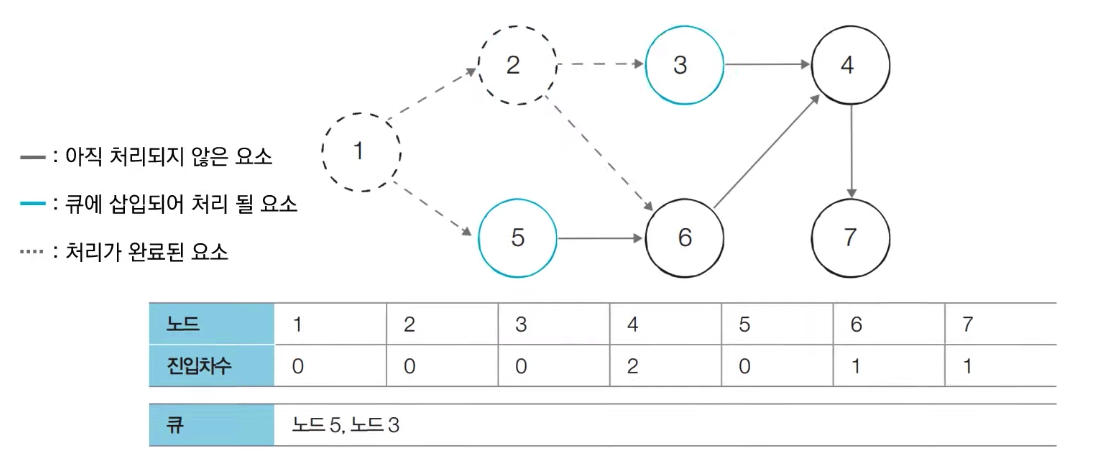<br>
    - 큐에서 노드 5를 꺼낸 뒤에 노드 5에서 나가는 간선을 제거한다. 새롭게 진입차수가 0이 된 노드들을 큐에 삽입한다.
    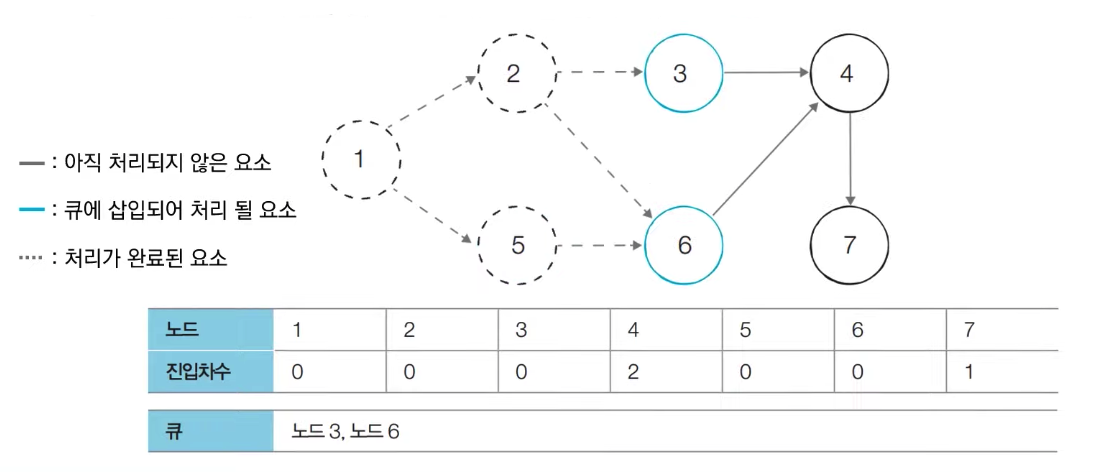<br>
    - 큐에서 노드 3를 꺼낸 뒤에 노드 3에서 나가는 간선을 제거한다. 새롭게 진입차수가 0이 된 노드들을 큐에 삽입한다.
    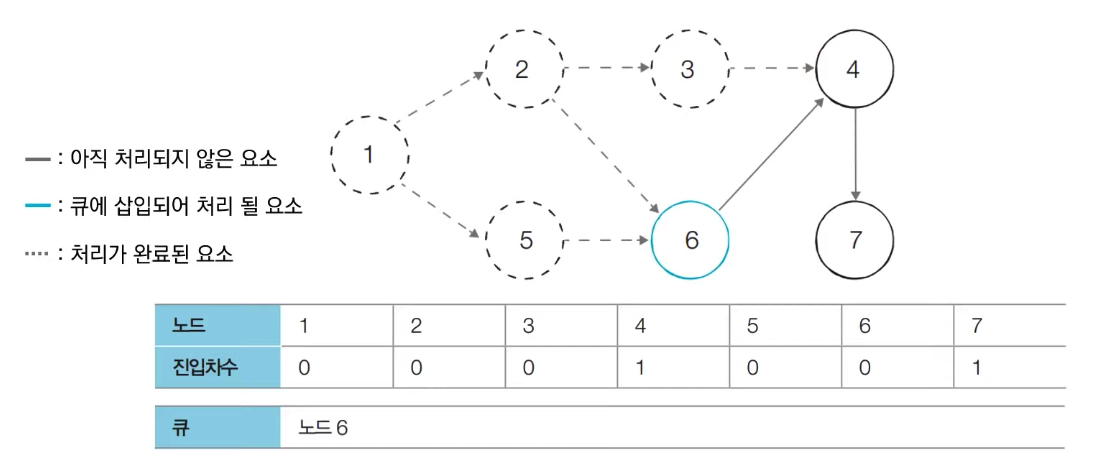<br>
    - 큐에서 노드 6을 꺼낸 뒤에 노드 6에서 나가는 간선을 제거한다. 새롭게 진입차수가 0이 된 노드들을 큐에 삽입한다.
    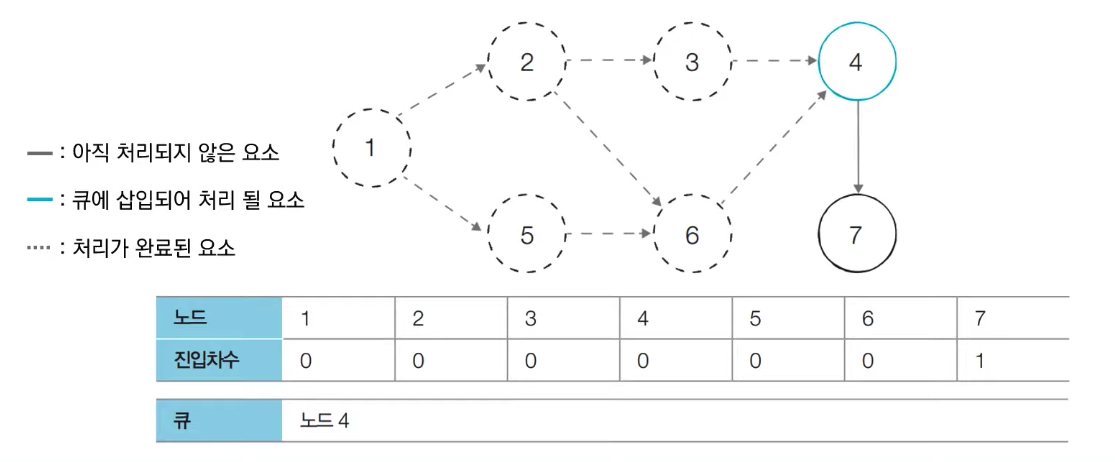<br>
    - 큐에서 노드 4를 꺼낸 뒤에 노드 4에서 나가는 간선을 제거한다. 새롭게 진입차수가 0이 된 노드들을 큐에 삽입한다.
    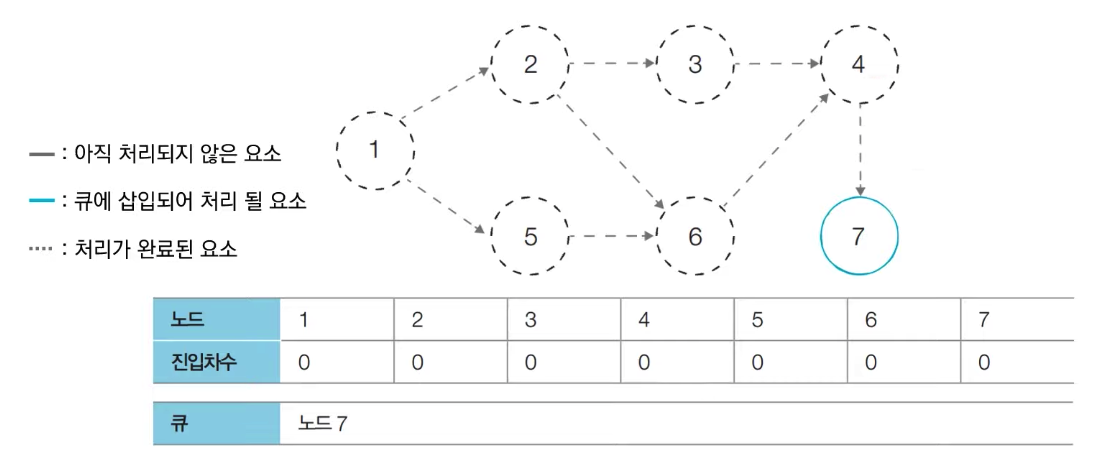<br>
    - 큐에서 노드 7을 꺼낸 뒤에 노드 7에서 나가는 간선을 제거한다. 새롭게 진입차수가 0이 된 노드들을 큐에 삽입한다.
    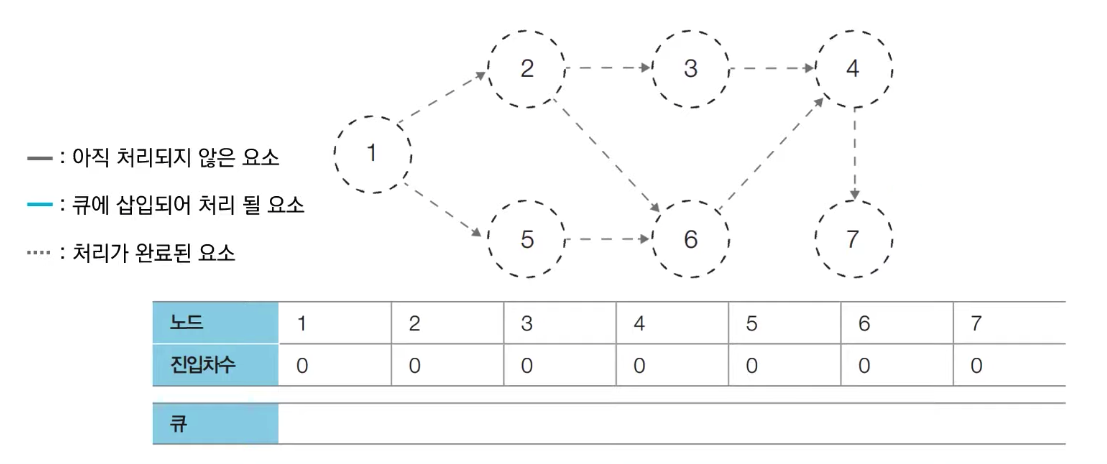<br>
    - 위상 정렬 결과, 큐에 삽입된 전체 노드 순서 : 1 → 2 → 5 → 3 → 6 → 4 → 7<br><br>
5. 위상 정렬 특징
    - 위상 정렬은 DAG에 대해서만 수행할 수 있다.
        * DAG(Direct Acyclic Graph) : 순환하지 않는 방향 그래프
    - 위상 정렬에서는 여러가지 답이 존재할 수 있다.
        * 한 단계에서 큐에 새롭게 들어가는 원소가 2개 이상인 경우가 있다면 여러가지 답이 존재한다.
    - 모든 원소를 방문하기 전에 큐가 빈다면 사이클이 존재한다고 판단할 수 있다.
        * 사이클에 포함된 원소 중 어떠한 원소도 큐에 들어가지 못한다.
    - 스택을 활용한 DFS를 이용해 위상 정렬을 수행할 수도 있다.

### 3. 알고리즘 구현

In [8]:
from collections import deque

# 노드의 개수와 간선의 개수를 입력 받기
v, e = map(int, input().split())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v + 1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트 초기화
graph = [[] for i in range(v + 1)]

# 방향 그래프의 모든 간선 정보를 입력 받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b) # 정점 A에서 B로 이동 가능
    # 진입 차수를 1 증가
    indegree[b] += 1

# 위상 정렬 함수
def topology_sort():
    result = [] # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용

    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)

    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    # 위상 정렬을 수행한 결과 출력
    for i in result:
        print(i, end=' ')

topology_sort()

7 8
1 5
1 2
5 6
2 6
2 3
3 4
4 7
6 4
1 5 2 6 3 4 7 

In [ ]:
# 코드 보완 - 연속되지 않은 수를 입력해도 가능

# Topology Algorithm
from collections import deque

# 정점과 간선을 생성
v, e = map(int, input().split())

# 초기화 - 진입 차수, 그래프, 결과, 큐
indegree = dict()
graph = dict()

# 그래프 생성 및 진입차수  
for i in range(1, e + 1):
    a, b = map(int, input().split())

    if not a in graph:
        graph[a] = [a]
        indegree[a] = 0
    if not b in graph:
        graph[b] = [b]
        indegree[b] = 0

    graph[a].append(b)
    indegree[b] += 1

# Topology Algorithm 함수 정의
def toploogy():
    # 결과 값 및 큐 생성
    result = list()
    q = deque()
    
    # 진입 차수가 0인 정점 q에 삽입
    for data in graph:
        if indegree[data] == 0:
            q.append(data)

    # 큐가 빌 때까지 실행
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        
        # 해당 원소와 연결된 노드들의 진입차수 1빼기
        for data in graph[now]:
            indegree[data] -= 1

            # 진입 차수가 0인 정점 q에 삽입
            if indegree[data] == 0:
                q.append(data)
    
    for i in result:
        print(i, end=' ')

toploogy()

### 4. 시간 복잡도
1. 시간 복잡도는 O(V+E)이다.
2. 위상 정렬을 수행할 때는 차례대로 모든 노드를 확인하기 때문에 O(V)가 소요된다.
3. 그리고 해당 노드에서 출발하는 간선을 차례대로 제거하므로 O(E)가 소요된다.
4. 따라서 노드와 간선을 모두 확인하는 것을 고려하여 O(V) + O(E) = O(V+E)의 시간이 소요된다.

참고 블로그 : https://freedeveloper.tistory.com/278?category=888096